In [19]:
import sys
sys.path.insert(0, '/home/serhii/AccountEye/')
import Models as M
import Experiment as E
import ImagePreprocessing.ImageProcessing as IP
import Data as D
import seaborn as sns
import cv2
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import confusion_matrix 
import numpy as np
import tensorflow as tf
import tensorflow.keras as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [20]:
csvPaths = ['Images/Labels/Clean.csv', 
            'Images/Labels/NewBalanced.csv', 
            'Images/Labels/YouTube.csv']
imgPath = 'Images/Preproc/'

csvPaths = ['/home/serhii/AccountEyeTest/Images/Augmented/NewBalanced_Blur+Augmentation.csv',]
imgPath = '/opt/AccountEye/Images/Preproc/'

trainPart = 0.7
testPart = 0.2
batchSize = 256
numClasses = 20
epochs = 10
rows, cols, channels = 48, 32, 3
input_shape = (rows, cols, channels)

In [21]:
(xTrain, yTrainO), (xTest, yTestO), (xValid, yValidO) = D.LoadData(csvPaths, imgPath, rows, cols, channels=channels,
                                                              trainPart=trainPart, testPart=testPart, balanceDS=True, labelRow='20_Classes')


In [4]:
print(xTrain.shape)
print(xTest.shape)
print(xValid.shape)
print(yTrainO.shape)
print(yTestO.shape)
print(yValidO.shape)

(4909, 48, 32, 3)
(1403, 48, 32, 3)
(702, 48, 32, 3)
(4909,)
(1403,)
(702,)


In [5]:
xTrain = xTrain.reshape(xTrain.shape[0], -1)
xTest = xTest.reshape(xTest.shape[0], -1)
xValid = xValid.reshape(xValid.shape[0], -1)

In [6]:
yTrain = K.utils.to_categorical(yTrainO, numClasses)
yTest = K.utils.to_categorical(yTestO, numClasses)
yValid = K.utils.to_categorical(yValidO, numClasses)

# SVM

In [7]:
modelSVM = SVC()

In [ ]:
modelSVM.fit(xTrain, yTrainO)

In [ ]:
accTrain = modelSVM.score(xTrain, yTrainO) 
accTest = modelSVM.score(xTest, yTestO) 
accValid = modelSVM.score(xValid, yValidO) 

In [ ]:
print(accTrain)
print(accTest)
print(accValid)

In [ ]:
predictTrainSVM = modelSVM.predict(xTrain)
predictTestSVM = modelSVM.predict(xTest)
predictValidSVM = modelSVM.predict(xValid)

In [ ]:
# creating a confusion matrix 
sns.heatmap(confusion_matrix(yTrainO, predictTrainSVM))

In [ ]:
sns.heatmap(confusion_matrix(yTestO, predictTestSVM))

In [ ]:
sns.heatmap(confusion_matrix(yValidO, predictValidSVM))

# K-Neighbors

In [11]:
modelKNN = KNN(n_neighbors = 7, n_jobs=10)

In [12]:
modelKNN.fit(xTrain, yTrainO) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=10, n_neighbors=7, p=2,
           weights='uniform')

In [13]:
accTrain = modelKNN.score(xTrain, yTrainO) 
accTest = modelKNN.score(xTest, yTestO) 
accValid = modelKNN.score(xValid, yValidO) 

In [14]:
print(accTrain)
print(accTest)
print(accValid)

0.8643308209411286
0.7868852459016393
0.801994301994302


In [15]:
# creating a confusion matrix 
predictTrainKNN = modelKNN.predict(xTrain)
predictTestKNN = modelKNN.predict(xTest)
predictValidKNN = modelKNN.predict(xValid)

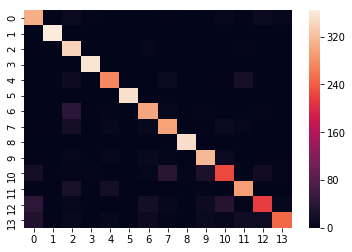

In [16]:
sns.heatmap(confusion_matrix(yTrainO, predictTrainKNN))

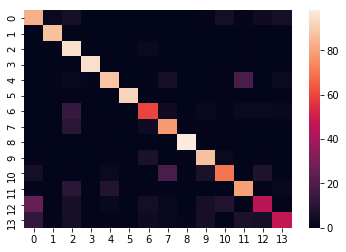

In [17]:
sns.heatmap(confusion_matrix(yTestO, predictTestKNN))

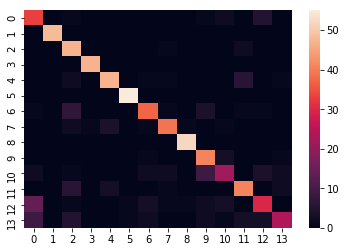

In [18]:
sns.heatmap(confusion_matrix(yValidO, predictValidKNN))